In [ ]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder 
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

###Data Analysis and Cleaning


In [ ]:
tkt=pd.read_excel("/content/drive/MyDrive/Flight_Ticket_Participant_Datasets/Dataset.xlsx")

tkt

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302
...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648


In [ ]:
tkt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [ ]:
tkt.describe()

,Price
count,10683.000000
mean,9087.064121
std,4611.359167
min,1759.000000
25%,5277.000000
50%,8372.000000
75%,12373.000000
max,79512.000000


In [ ]:
for i in tkt.columns:
    print("unique values in {} are \n{}".format(i,tkt[i].unique()))

unique values in Airline are 
['IndiGo' 'Air India' 'Jet Airways' 'SpiceJet' 'Multiple carriers' 'GoAir'
 'Vistara' 'Air Asia' 'Vistara Premium economy' 'Jet Airways Business'
 'Multiple carriers Premium economy' 'Trujet']
unique values in Date_of_Journey are 
['24/03/2019' '1/05/2019' '9/06/2019' '12/05/2019' '01/03/2019'
 '24/06/2019' '12/03/2019' '27/05/2019' '1/06/2019' '18/04/2019'
 '9/05/2019' '24/04/2019' '3/03/2019' '15/04/2019' '12/06/2019'
 '6/03/2019' '21/03/2019' '3/04/2019' '6/05/2019' '15/05/2019'
 '18/06/2019' '15/06/2019' '6/04/2019' '18/05/2019' '27/06/2019'
 '21/05/2019' '06/03/2019' '3/06/2019' '15/03/2019' '3/05/2019'
 '9/03/2019' '6/06/2019' '24/05/2019' '09/03/2019' '1/04/2019'
 '21/04/2019' '21/06/2019' '27/03/2019' '18/03/2019' '12/04/2019'
 '9/04/2019' '1/03/2019' '03/03/2019' '27/04/2019']
unique values in Source are 
['Banglore' 'Kolkata' 'Delhi' 'Chennai' 'Mumbai']
unique values in Destination are 
['New Delhi' 'Banglore' 'Cochin' 'Kolkata' 'Delhi' 'Hyderaba

In [ ]:
tkt.dropna(inplace=True)

In [ ]:
tkt['date']=pd.to_datetime(tkt['Date_of_Journey'], format = "%d/%m/%Y").dt.day
tkt['month']=pd.to_datetime(tkt['Date_of_Journey'], format = "%d/%m/%Y").dt.month
tkt['year']=pd.to_datetime(tkt['Date_of_Journey'], format = "%d/%m/%Y").dt.year

In [ ]:
tkt

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,date,month,year
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,2019
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5,2019
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6,2019
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5,2019
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3,2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107,9,4,2019
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145,27,4,2019
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229,27,4,2019
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648,1,3,2019


In [ ]:
for i in tkt.columns:
    print("no of unique values in {} are {}".format(i,len(tkt[i].unique())))

no of unique values in Airline are 12
no of unique values in Date_of_Journey are 44
no of unique values in Source are 5
no of unique values in Destination are 6
no of unique values in Route are 128
no of unique values in Dep_Time are 222
no of unique values in Arrival_Time are 1343
no of unique values in Duration are 368
no of unique values in Total_Stops are 5
no of unique values in Additional_Info are 10
no of unique values in Price are 1870
no of unique values in date are 10
no of unique values in month are 4
no of unique values in year are 1


As only 1 unique value in year, it is dropped

As Date_of_Journey has now been broken into new columns, it is dropped

In [ ]:
tkt.drop('Date_of_Journey',inplace=True,axis=1)
tkt.drop('year',inplace=True,axis=1)

In [ ]:
tkt

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,date,month
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107,9,4
10679,Air India,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145,27,4
10680,Jet Airways,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229,27,4
10681,Vistara,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648,1,3


In [ ]:
tkt['dep_hr']=pd.to_datetime(tkt['Dep_Time']).dt.hour
tkt['dep_min']=pd.to_datetime(tkt['Dep_Time']).dt.minute

tkt['arr_hr']=pd.to_datetime(tkt['Arrival_Time']).dt.hour
tkt['arr_min']=pd.to_datetime(tkt['Arrival_Time']).dt.minute

In [ ]:
k=tkt["Duration"][2].index("h")
a=int(tkt["Duration"][2][:k])
print(a)

19


In [ ]:
tkt=tkt.drop_duplicates()
tkt

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,date,month,dep_hr,dep_min,arr_hr,arr_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3,16,50,21,35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107,9,4,19,55,22,25
10679,Air India,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145,27,4,20,45,23,20
10680,Jet Airways,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229,27,4,8,20,11,20
10681,Vistara,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648,1,3,11,30,14,10


In [ ]:
tkt=tkt.set_index([pd.Index([i for i in range(len(tkt))])])
tkt

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,date,month,dep_hr,dep_min,arr_hr,arr_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3,16,50,21,35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10457,Air Asia,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107,9,4,19,55,22,25
10458,Air India,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145,27,4,20,45,23,20
10459,Jet Airways,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229,27,4,8,20,11,20
10460,Vistara,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648,1,3,11,30,14,10


In [ ]:
for i in range(len(tkt)):
    count=0
    if "h" in tkt["Duration"][i]:
        k=tkt["Duration"][i].index("h")
        count+=60*int(tkt["Duration"][i][:k])

    if k!=len(tkt["Duration"][i])-1:
        count+=int(tkt["Duration"][i][k+2:tkt["Duration"][i].index("m")])

    tkt["Duration"][i]=count

    if tkt["Total_Stops"][i]=="non-stop":
        tkt["Total_Stops"][i]=0
    else:
        tkt["Total_Stops"][i]=int(tkt["Total_Stops"][i][:tkt["Total_Stops"][i].index("s")-1])

tkt["Duration"]=tkt["Duration"].astype(np.int64)
tkt["Total_Stops"]=tkt["Total_Stops"].astype(np.int64)


In [ ]:
tkt.drop('Dep_Time',inplace=True,axis=1)
tkt.drop('Arrival_Time',inplace=True,axis=1)

In [ ]:
tkt

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,date,month,dep_hr,dep_min,arr_hr,arr_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,170,0,No info,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,445,2,No info,7662,1,5,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,1140,2,No info,13882,9,6,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,325,1,No info,6218,12,5,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,285,1,No info,13302,1,3,16,50,21,35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10457,Air Asia,Kolkata,Banglore,CCU → BLR,150,0,No info,4107,9,4,19,55,22,25
10458,Air India,Kolkata,Banglore,CCU → BLR,155,0,No info,4145,27,4,20,45,23,20
10459,Jet Airways,Banglore,Delhi,BLR → DEL,180,0,No info,7229,27,4,8,20,11,20
10460,Vistara,Banglore,New Delhi,BLR → DEL,160,0,No info,12648,1,3,11,30,14,10


In [ ]:
tkt.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10462 entries, 0 to 10461
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10462 non-null  object
 1   Source           10462 non-null  object
 2   Destination      10462 non-null  object
 3   Route            10462 non-null  object
 4   Duration         10462 non-null  int64 
 5   Total_Stops      10462 non-null  int64 
 6   Additional_Info  10462 non-null  object
 7   Price            10462 non-null  int64 
 8   date             10462 non-null  int64 
 9   month            10462 non-null  int64 
 10  dep_hr           10462 non-null  int64 
 11  dep_min          10462 non-null  int64 
 12  arr_hr           10462 non-null  int64 
 13  arr_min          10462 non-null  int64 
dtypes: int64(9), object(5)
memory usage: 1.4+ MB


###Visualisations


In [ ]:
import seaborn as sb
from matplotlib.pyplot import figure

####Entire Dataset Visualisation

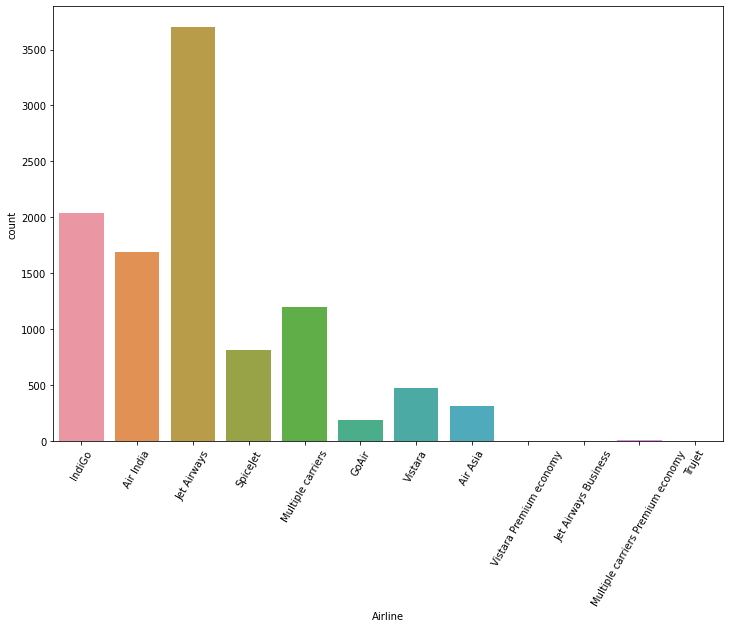

In [ ]:
figure(figsize=(12,8))
sb.countplot(tkt["Airline"])
plt.xticks(rotation=60)

plt.show()

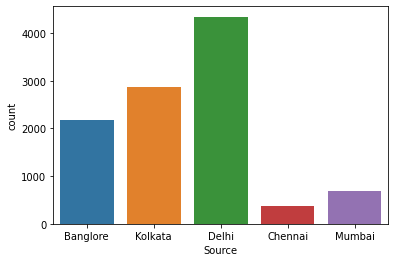

In [ ]:
sb.countplot(tkt["Source"])
plt.show()

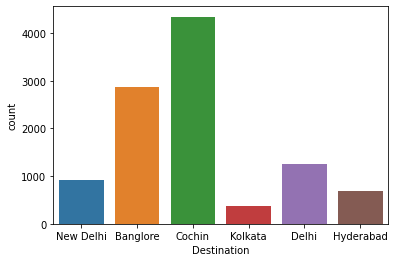

In [ ]:
sb.countplot(tkt["Destination"])
plt.show()

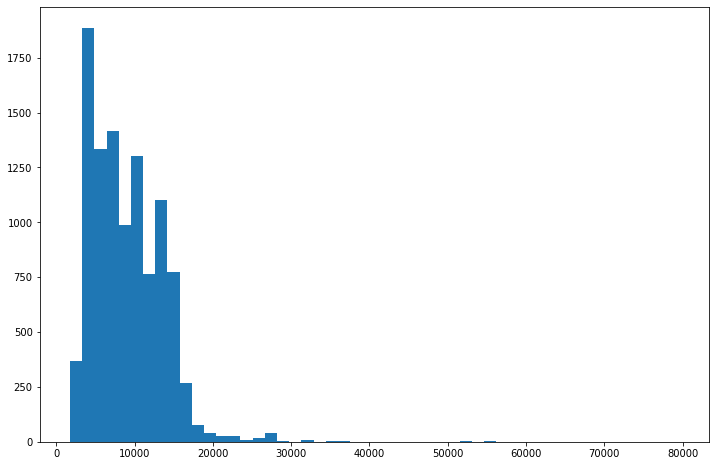

In [ ]:
figure(figsize=(12,8))
plt.hist(tkt["Price"],bins=50)
plt.show()

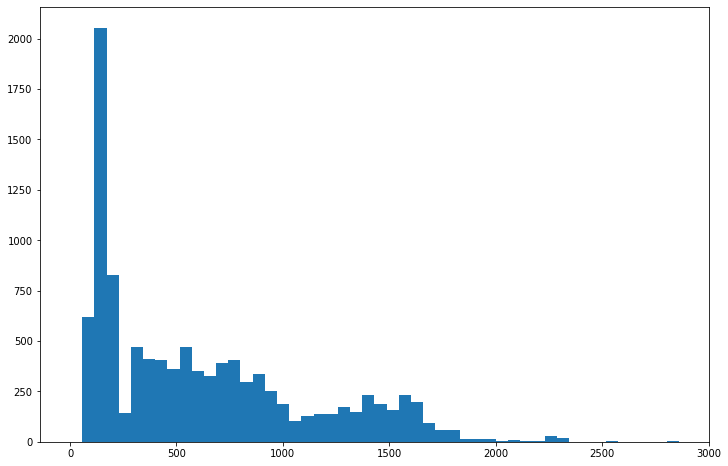

In [ ]:
figure(figsize=(12,8))
plt.hist(tkt["Duration"],bins=50)
plt.show()

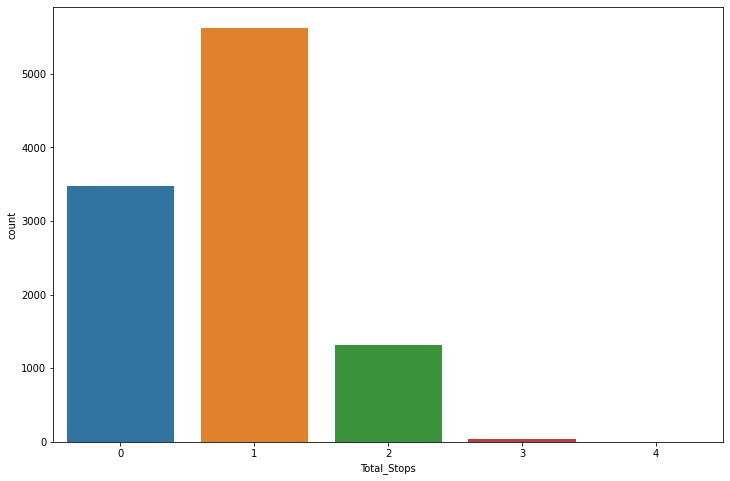

In [ ]:
figure(figsize=(12,8))
sb.countplot(tkt["Total_Stops"])
plt.show()

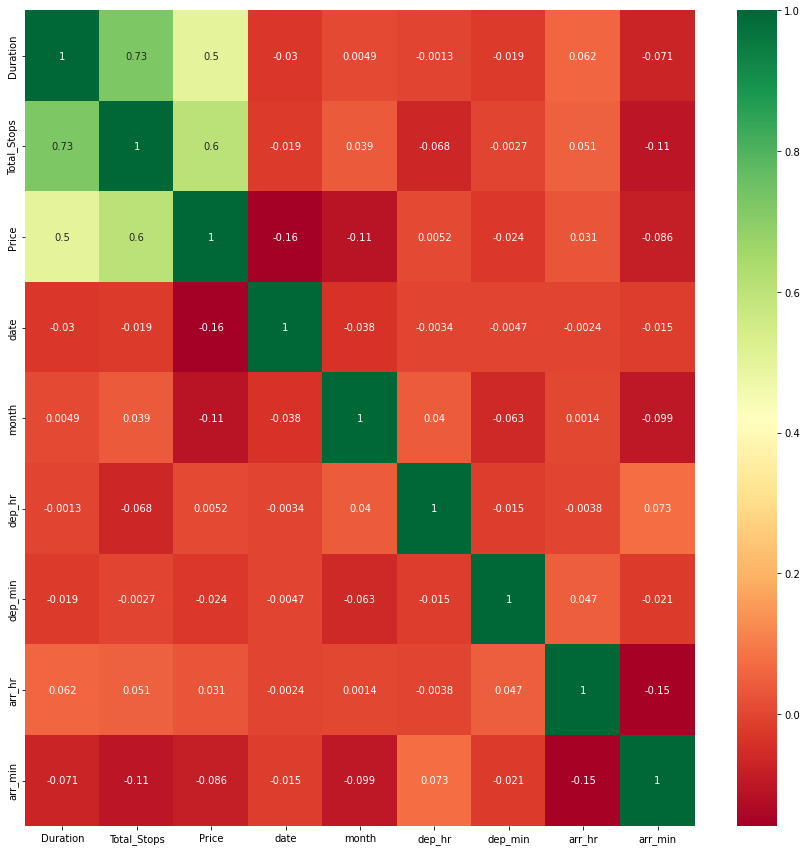

In [ ]:
plt.figure(figsize = (15,15))
sb.heatmap(tkt.corr(), annot = True, cmap = "RdYlGn")
plt.show()

####Checking most common Source-Destination combinations

In [ ]:
from collections import Counter
from  itertools import combinations

In [ ]:
df = tkt.iloc[:,1:3]
c = Counter(y for x in df.values for y in combinations(x, 2))
print(c)

Counter({('Delhi', 'Cochin'): 4345, ('Kolkata', 'Banglore'): 2860, ('Banglore', 'Delhi'): 1265, ('Banglore', 'New Delhi'): 914, ('Mumbai', 'Hyderabad'): 697, ('Chennai', 'Kolkata'): 381})


Most common Source-Destination combination is Delhi -> Cochin with 4345 flights


####Visualising prices for the most common Source-Destination combinations(Delhi -> Cochin)

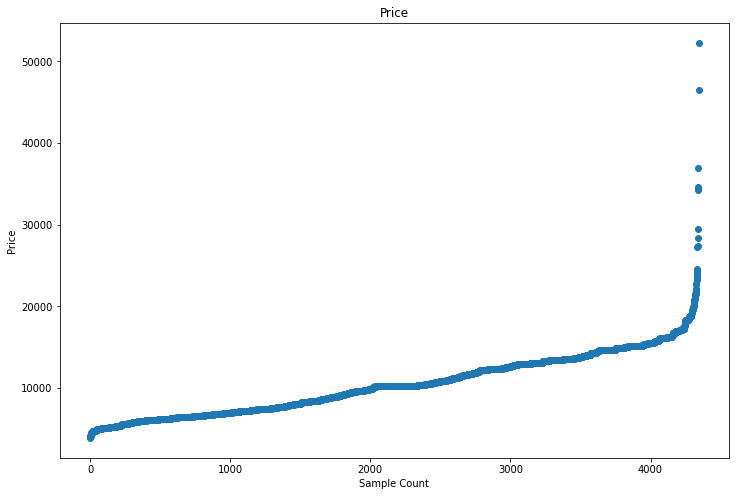

[3876, 3948, 4098, 4106, 4106, 4201, 4256, 4256, 4414, 4466, 4466, 4487, 4487, 4487, 4525, 4563, 4563, 4611, 4692, 4692, 4697, 4725, 4729, 4729, 4729, 4729, 4729, 4729, 4729, 4729, 4729, 4729, 4729, 4744, 4744, 4757, 4760, 4760, 4760, 4760, 4760, 4812, 4812, 4812, 4812, 4812, 4832, 4851, 4851, 4862, 4886, 4886, 4939, 4957, 4957, 4957, 4957, 4957, 4957, 4957, 4957, 4959, 4959, 4959, 4959, 4959, 5000, 5000, 5000, 5000, 5000, 5000, 5000, 5000, 5000, 5000, 5013, 5021, 5021, 5021, 5022, 5022, 5022, 5046, 5052, 5054, 5054, 5054, 5054, 5054, 5054, 5054, 5054, 5054, 5054, 5054, 5054, 5054, 5054, 5058, 5065, 5065, 5073, 5073, 5073, 5073, 5073, 5073, 5073, 5073, 5073, 5073, 5073, 5073, 5073, 5073, 5073, 5073, 5111, 5117, 5117, 5117, 5117, 5117, 5117, 5117, 5117, 5117, 5117, 5135, 5135, 5135, 5140, 5158, 5158, 5158, 5158, 5158, 5164, 5177, 5177, 5177, 5177, 5177, 5177, 5177, 5177, 5177, 5177, 5177, 5177, 5177, 5199, 5201, 5201, 5201, 5201, 5201, 5201, 5201, 5201, 5201, 5201, 5201, 5201, 5201, 520

In [ ]:
A=[]
B=[]

for i in range(len(tkt)):
    if tkt["Source"][i]=="Delhi" and tkt["Destination"][i]=="Cochin":
        A.append(tkt["Price"][i])
        B.append(i)

A.sort()

figure(figsize=(12,8))
plt.scatter([i for i in range(len(A))],A)
plt.xlabel("Sample Count")
plt.ylabel("Price")
plt.title("Price")
plt.show()

print(A)

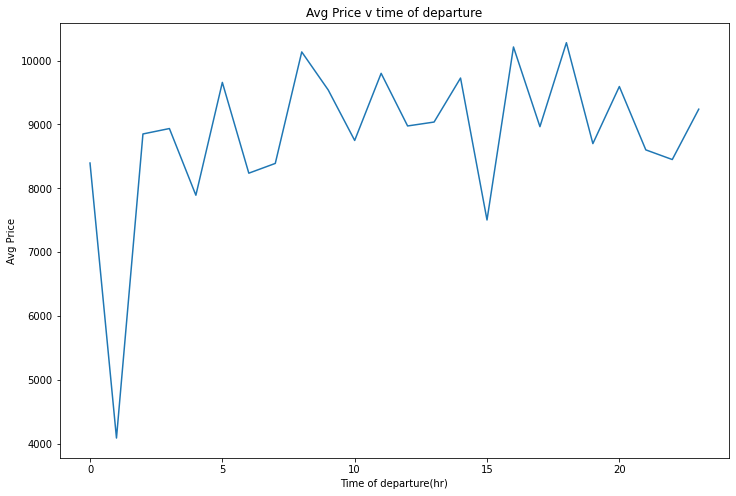

[8395.625, 4091.4210526315787, 8850.412698412698, 8935.25, 7891.704225352113, 9657.412, 8236.735714285714, 8389.505714285715, 10134.258899676375, 9539.192513368984, 8749.046948356807, 9799.32735426009, 8975.704225352112, 9036.894444444444, 9725.773684210526, 7504.139130434783, 10211.91282051282, 8964.71582733813, 10278.974226804125, 8699.371681415929, 9592.75, 8601.446078431372, 8450.194805194806, 9238.142857142857]


In [ ]:
A=[0 for i in range(24)]
C=[0 for i in range(24)]

for i in range(len(B)):
    A[tkt["dep_hr"][i]]+=(tkt["Price"][i])
    C[tkt["dep_hr"][i]]+=1

D=[A[i]/C[i] for i in range(len(A))]

figure(figsize=(12,8))
plt.plot(D)
plt.xlabel("Time of departure(hr)")
plt.ylabel("Avg Price")
plt.title("Avg Price v time of departure")
plt.show()

print(D)

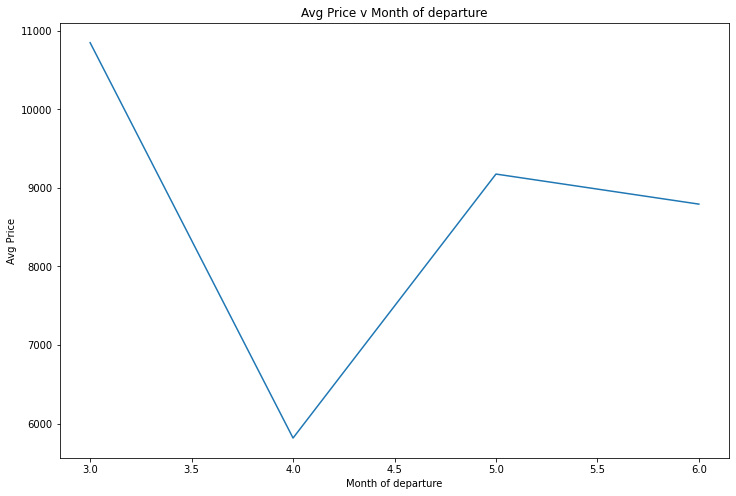

[10848.296633303004, 5816.969976905311, 9176.439245810056, 8793.834902244751]


In [ ]:
A=[0 for i in range(12)]
C=[0 for i in range(12)]

for i in range(len(B)):
    A[tkt["month"][i]-1]+=(tkt["Price"][i])
    C[tkt["month"][i]-1]+=1

D=[]
E=[]
for i in range(12):
    if C[i]!=0:
        D.append(A[i]/C[i])
        E.append(i+1)

figure(figsize=(12,8))
plt.plot([i for i in E],D)
plt.xlabel("Month of departure")
plt.ylabel("Avg Price")
plt.title("Avg Price v Month of departure")
plt.show()

print(D)

In [ ]:
A=Counter(tkt["Route"])
print(A)

Counter({'DEL → BOM → COK': 2376, 'BLR → DEL': 1536, 'CCU → BOM → BLR': 979, 'CCU → BLR': 724, 'BOM → HYD': 621, 'CCU → DEL → BLR': 565, 'BLR → BOM → DEL': 402, 'MAA → CCU': 381, 'DEL → HYD → COK': 326, 'DEL → BLR → COK': 232, 'DEL → COK': 213, 'DEL → JAI → BOM → COK': 183, 'DEL → MAA → COK': 146, 'DEL → AMD → BOM → COK': 144, 'DEL → IDR → BOM → COK': 90, 'DEL → HYD → MAA → COK': 83, 'CCU → MAA → BLR': 65, 'CCU → HYD → BLR': 53, 'CCU → BBI → BLR': 50, 'DEL → BHO → BOM → COK': 48, 'CCU → IXR → DEL → BLR': 46, 'DEL → HYD → BOM → COK': 45, 'DEL → CCU → BOM → COK': 44, 'DEL → NAG → BOM → COK': 44, 'DEL → GOI → BOM → COK': 44, 'DEL → PNQ → COK': 42, 'CCU → BBI → BOM → BLR': 42, 'DEL → LKO → BOM → COK': 41, 'CCU → GAU → BLR': 41, 'DEL → ATQ → BOM → COK': 40, 'CCU → GAU → DEL → BLR': 38, 'DEL → JDH → BOM → COK': 37, 'BLR → HYD → DEL': 37, 'BOM → DEL → HYD': 33, 'CCU → BOM → COK → BLR': 30, 'BLR → MAA → DEL': 29, 'CCU → DEL → COK → BLR': 29, 'DEL → BDQ → BOM → COK': 27, 'DEL → AMD → COK': 25, 

###Encoding and splitting into train and test

In [ ]:
def encode1(tkt_encode):
    mask=tkt_encode.dtypes==object
    cat_cols=tkt_encode.columns[mask].tolist()    
    lbcode=LabelEncoder()
    tkt_encode[cat_cols]=tkt_encode[cat_cols].apply(lambda col: lbcode.fit_transform(col))

    return tkt_encode
    

def randomsplit(tkt_split):
    tkt_random=tkt_split.sample(frac=1,random_state=0)
    train=tkt_random[:int(len(tkt_random)*0.7)]
    test=tkt_random[int(len(tkt_random)*0.7):]

    return train,test

tkt=encode1(tkt)

tkt=pd.DataFrame(tkt)
train,test=randomsplit(tkt)    
tkt

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,date,month,dep_hr,dep_min,arr_hr,arr_min
0,3,0,5,18,170,0,8,3897,24,3,22,20,1,10
1,1,3,0,84,445,2,8,7662,1,5,5,50,13,15
2,4,2,1,118,1140,2,8,13882,9,6,9,25,4,25
3,3,3,0,91,325,1,8,6218,12,5,18,5,23,30
4,3,0,5,29,285,1,8,13302,1,3,16,50,21,35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10457,0,3,0,64,150,0,8,4107,9,4,19,55,22,25
10458,1,3,0,64,155,0,8,4145,27,4,20,45,23,20
10459,4,0,2,18,180,0,8,7229,27,4,8,20,11,20
10460,10,0,5,18,160,0,8,12648,1,3,11,30,14,10


###Building base models

In [ ]:
test["price"]=test["Price"]
test.drop("Price",axis=1,inplace=True)

train["price"]=train["Price"]
train.drop("Price",axis=1,inplace=True)


In [ ]:
train

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,date,month,dep_hr,dep_min,arr_hr,arr_min,price
3658,10,3,0,73,900,1,8,24,3,7,10,22,10,12942
7885,8,2,1,121,380,1,8,24,6,15,45,22,5,5583
2876,4,3,0,66,890,1,8,9,6,21,10,12,0,14571
3822,6,2,1,104,930,1,8,9,5,10,0,1,30,15078
2573,3,2,1,111,455,1,8,21,3,8,35,16,10,6790
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9769,4,4,3,48,90,0,5,21,6,19,35,21,5,3210
6702,6,2,1,104,455,1,8,21,5,11,40,19,15,8266
5086,4,2,1,118,1000,2,8,12,6,11,45,4,25,13882
7372,6,2,1,104,480,1,8,24,6,13,0,21,0,13587


In [ ]:
test

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,date,month,dep_hr,dep_min,arr_hr,arr_min,price
2743,4,2,1,104,520,1,8,3,6,19,45,4,25,14714
6315,3,3,0,64,155,0,8,24,5,15,30,18,5,4804
5600,4,2,1,104,1655,1,5,3,6,9,0,12,35,10262
6401,1,2,1,103,1590,1,8,21,3,20,30,23,0,5704
2541,1,2,1,121,1420,1,8,15,5,9,45,9,25,7480
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9225,1,3,0,90,1440,1,8,24,3,14,35,14,35,6241
4859,3,2,1,104,635,1,8,21,3,15,0,1,35,7006
3264,8,1,4,127,140,0,8,24,6,17,45,20,5,3597
9845,4,2,1,104,1620,1,5,24,6,16,0,19,0,10262


In [ ]:
X_train=train.iloc[:,:-1].to_numpy()
Y_train=train.iloc[:,-1].to_numpy()

X_test=test.iloc[:,:-1].to_numpy()
Y_test=test.iloc[:,-1].to_numpy()

In [ ]:
Y_test  

array([14714,  4804, 10262, ...,  3597, 10262,  7923])

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor 
from sklearn.neural_network import MLPRegressor
from sklearn.linear_model import LogisticRegression
import xgboost
import lightgbm

from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score as r2

In [ ]:
MAE=[]
RMSE=[]
R2=[]
a=["Random Forest","Decision Tree","XGB","LGBM","MLP"]

In [ ]:
rfr=RandomForestRegressor(random_state=0)
rfr.fit(X_train,Y_train)

Y_pred=rfr.predict(X_test)

MAE.append(mae(Y_test,Y_pred))
RMSE.append(np.sqrt(mse(Y_test,Y_pred)))
R2.append(r2(Y_test,Y_pred))


print("Mean absolute error for Random Forest Regressor",MAE[-1])
print("Root Mean squared error for Random Forest Regressor",RMSE[-1])
print("r2 score for Random Forest Regressor",R2[-1])

Mean absolute error for Random Forest Regressor 683.9891819581608
Root Mean squared error for Random Forest Regressor 1549.5923634017277
r2 score for Random Forest Regressor 0.8838164550418893


In [ ]:
dtr=DecisionTreeRegressor(random_state=0)
dtr.fit(X_train,Y_train)

Y_pred=dtr.predict(X_test)

MAE.append(mae(Y_test,Y_pred))
RMSE.append(np.sqrt(mse(Y_test,Y_pred)))
R2.append(r2(Y_test,Y_pred))


print("Mean absolute error for Decision Tree Regressor",MAE[-1])
print("Root Mean squared error for Decision Tree Regressor",RMSE[-1])
print("r2 score for Decision Tree Regressor",R2[-1])

Mean absolute error for Decision Tree Regressor 798.3249442497611
Root Mean squared error for Decision Tree Regressor 2113.761293596735
r2 score for Decision Tree Regressor 0.7838169844751915


In [ ]:
xgb=xgboost.XGBRegressor(random_state=0)
xgb.fit(X_train,Y_train)

Y_pred=xgb.predict(X_test)

MAE.append(mae(Y_test,Y_pred))
RMSE.append(np.sqrt(mse(Y_test,Y_pred)))
R2.append(r2(Y_test,Y_pred))


print("Mean absolute error for XGBoost Regressor",MAE[-1])
print("Root Mean squared error for XGBoost Regressor",RMSE[-1])
print("r2 score for XGBoost Regressor",R2[-1])

[17:20:20] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Mean absolute error for XGBoost Regressor 1205.9768384123502
Root Mean squared error for XGBoost Regressor 1866.018869695122
r2 score for XGBoost Regressor 0.8315225615718242


In [ ]:
lgb=lightgbm.LGBMRegressor(random_state=0)
lgb.fit(X_train,Y_train)

Y_pred=lgb.predict(X_test)

MAE.append(mae(Y_test,Y_pred))
RMSE.append(np.sqrt(mse(Y_test,Y_pred)))
R2.append(r2(Y_test,Y_pred))


print("Mean absolute error for LightGBM Regressor",MAE[-1])
print("Root Mean squared error for LightGBM Regressor",RMSE[-1])
print("r2 score for LightGBM Regressor",R2[-1])

Mean absolute error for LightGBM Regressor 846.0352788996527
Root Mean squared error for LightGBM Regressor 1516.4598606117156
r2 score for LightGBM Regressor 0.8887316809096782


In [ ]:
mlp=MLPRegressor(random_state=0)
mlp.fit(X_train,Y_train)

Y_pred=mlp.predict(X_test)

MAE.append(mae(Y_test,Y_pred))
RMSE.append(np.sqrt(mse(Y_test,Y_pred)))
R2.append(r2(Y_test,Y_pred))


print("Mean absolute error for MLP Regressor",MAE[-1])
print("Root Mean squared error for MLP Regressor",RMSE[-1])
print("r2 score for MLP Regressor",R2[-1])

Mean absolute error for MLP Regressor 2395.2368296707587
Root Mean squared error for MLP Regressor 3427.5181211417143
r2 score for MLP Regressor 0.43158018671690346


###Performance Evaluation of Base Models

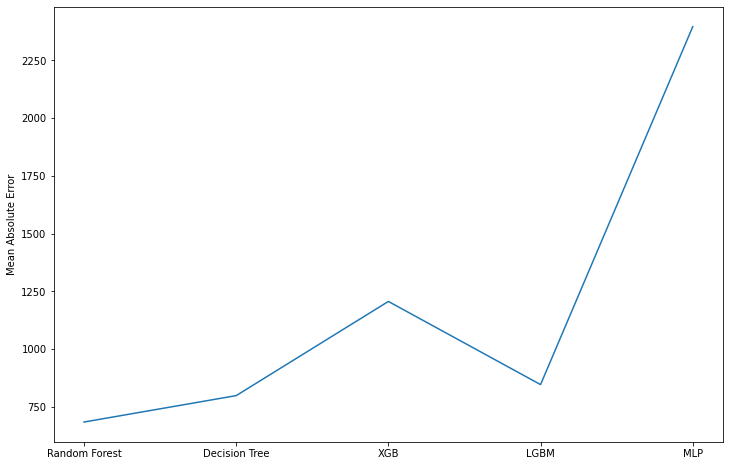

In [ ]:
figure(figsize=(12,8))
plt.plot([i for i in a],MAE)
plt.ylabel("Mean Absolute Error")
plt.show()

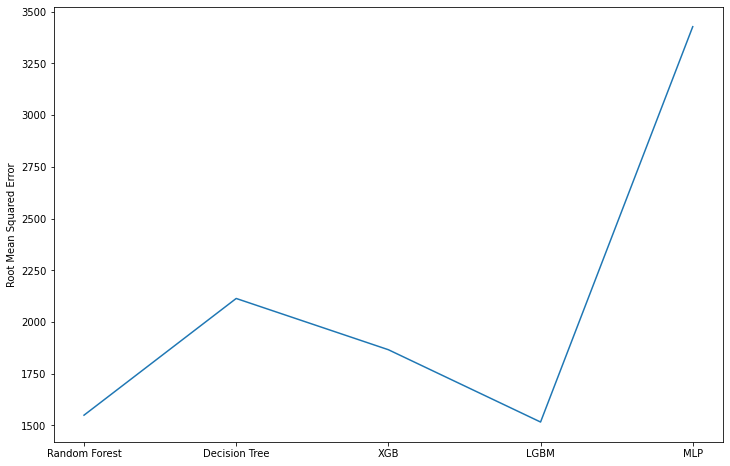

In [ ]:
figure(figsize=(12,8))
plt.plot([i for i in a],RMSE)
plt.ylabel("Root Mean Squared Error")
plt.show()

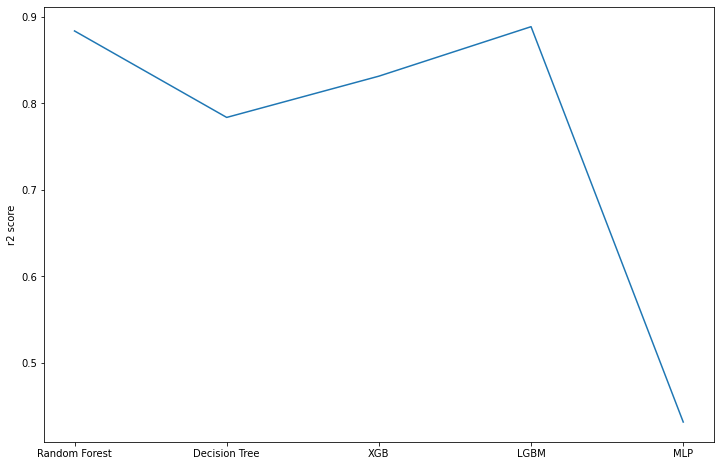

In [ ]:
figure(figsize=(12,8))
plt.plot([i for i in a],R2)
plt.ylabel("r2 score")
plt.show()

As is evident from the graphs, Random Forest Regressor and LightGBM Regressor have similar scores across all parameters

###Hyperparameter tuning

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV

n_estimators = [100,500,750,1000,3000]
max_depth = [7,8,9,10]
min_samples_split = [5, 10, 50, 100, 200]
min_samples_leaf = [2, 5, 10, 15]


In [ ]:
random_grid = {'n_estimators': n_estimators,
               'max_features': ["auto"],
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}


rf_random = RandomizedSearchCV(estimator = rfr, param_distributions = random_grid,scoring='neg_mean_squared_error', n_iter = 10, cv = 5, random_state=42, n_jobs = 1)
rf_random.fit(X_train,Y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(random_state=0),
                   n_jobs=1,
                   param_distributions={'max_depth': [7, 8, 9, 10],
                                        'max_features': ['auto'],
                                        'min_samples_leaf': [2, 5, 10, 15],
                                        'min_samples_split': [5, 10, 50, 100,
                                                              200],
                                        'n_estimators': [100, 500, 750, 1000,
                                                         3000]},
                   random_state=42, scoring='neg_mean_squared_error')

In [ ]:
rf_random.best_params_

{'max_depth': 10,
 'max_features': 'auto',
 'min_samples_leaf': 5,
 'min_samples_split': 5,
 'n_estimators': 3000}

In [ ]:
rf_random=RandomForestRegressor(max_depth=11,max_features='auto', min_samples_leaf= 5,min_samples_split= 5, n_estimators= 3000)
rf_random.fit(X_train,Y_train)
prediction = rf_random.predict(X_test)


In [ ]:
MAE.append(mae(Y_test,prediction))
RMSE.append(np.sqrt(mse(Y_test,prediction)))
R2.append(r2(Y_test,prediction))


print("Mean absolute error for Random Forest Regressor",MAE[-1])
print("Mean squared error for Random Forest Regressor",RMSE[-1])
print("r2 score for Random Forest Regressor",R2[-1])
print("scores on base case:",MAE[0],RMSE[0],R2[0])

Mean absolute error for Random Forest Regressor 860.3020160432687
Mean squared error for Random Forest Regressor 1702.0034036040397
r2 score for Random Forest Regressor 0.8598379189726701
scores on base case: 683.9891819581608 1549.5923634017277 0.8838164550418893


In [ ]:
lgb=lightgbm.LGBMRegressor(max_depth=11,random_state=42)
lgb.fit(X_train,Y_train)
prediction = lgb.predict(X_test)
print(r2(Y_test,prediction))

0.8907818156571737


In [ ]:
max1=R2[-1]

for i in [0.01,0.1,0.25,0.5]:
    for j in [10,50,100,500,1000,2000,5000]:
        for k in [5,10,20,50,100]:
            for l in [9,10,11,12]:

                lgb = lightgbm.LGBMRegressor(random_state=42,learning_rate=i,num_iterations=j,num_leaves=k,max_depth=l)
                lgb.fit(X_train,Y_train)
                prediction = lgb.predict(X_test)
                
                if r2(Y_test,prediction)>max1:
                    max1=r2(Y_test,prediction)
                    A=[i,j,k,l]
                    print("found")

found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found


In [ ]:
print(A)

[0.1, 1000, 20, 9]


In [ ]:
lgb = lightgbm.LGBMRegressor(random_state=42,learning_rate=0.1,num_iterations=1000,num_leaves=20,max_depth=9)
lgb.fit(X_train,Y_train)
prediction = lgb.predict(X_train)
                
print("Mean absolute error for lightGBM Regressor after hyperparamter tuning: ",mae(Y_train,prediction))
print("Root Mean squared error for lightGBM Regressor after hyperparamter tuning: ",np.sqrt(mse(Y_train,prediction)))
print("R2 score for lightGBM Regressor after hyperparamter tuning: ",r2(Y_train,prediction))

Mean absolute error for lightGBM Regressor after hyperparamter tuning:  435.47950021258134
Root Mean squared error for lightGBM Regressor after hyperparamter tuning:  733.8583002034916
R2 score for lightGBM Regressor after hyperparamter tuning:  0.9751771130313345


In [ ]:
lgb = lightgbm.LGBMRegressor(random_state=42,learning_rate=0.1,num_iterations=1000,num_leaves=20,max_depth=9)
lgb.fit(X_train,Y_train)
prediction = lgb.predict(X_test)
                
print("Mean absolute error for lightGBM Regressor after hyperparamter tuning: ",mae(Y_test,prediction))
print("Root Mean squared error for lightGBM Regressor after hyperparamter tuning: ",np.sqrt(mse(Y_test,prediction)))
print("R2 score for lightGBM Regressor after hyperparamter tuning: ",r2(Y_test,prediction))

Mean absolute error for lightGBM Regressor after hyperparamter tuning:  695.6520826342401
Root Mean squared error for lightGBM Regressor after hyperparamter tuning:  1322.9405269888114
R2 score for lightGBM Regressor after hyperparamter tuning:  0.9153181513777635
